# Final Project Submission

Please fill out:
* Student names: Mary Mwangi, Maureen Oketch, Peter Kinyanjui, Brian Korir and Rwenji Murengaitta
* Student pace: part time
* Scheduled project review date/time: 2023/11/04
* Instructor name: Faith Rotich



## 1. Introduction

### 1.1 project overview

Falcon Real Estate agencies, a well-established real estate firm located in King County, USA, is seeking assistance in identifying the primary factors that affect property values within the region. The agency aims to leverage this knowledge to inform their pricing strategies for residential properties.

### 1.2 Research questions

- What are the key factors that determine the prices of houses in the real estate market?

- Which specific features have a positive impact on the value of a house, and which ones have a negative impact?

- How can the predictive model help distinguish between overpriced and underpriced properties in the market?

- In what ways can analytical insights and a refined pricing strategy be employed to increase the annual
revenue of the real estate agency and achieve a more profitable operation?

### 1.3 Objectives

#### 1.3.1 Main objective

-To create an optimal predictive model that will enable the agency to accurately establish competitive property prices

#### 1.3.2 Specific objectives

-To understand which factors determines the prices of a houses.

-To explore which features will decrease and increase value of the house.

-To distinguish between overpriced and underpriced properties by juxtaposing the predicted prices with the actual selling prices.

-To bolster the annual revenue of the agency by employing the analytical insights and refined pricing strategy, thus achieving a more profitable real estate operation

## 2. Exploratory Data Analysis

### 2.1 Importing relevant libraries

In [2]:
# Your code here - remember to use markdown cells for comments as well!
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

### 2.2 Loading the data set

In [3]:
#load the dataset
df = pd.read_csv("data/kc_house_data.csv")
#output the first five rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 2.3 Data source and Description

This dataset contains house sale prices for King County

- **id** -Unique identified for a house

- **date** - Date house was sold

- **price** - Price is prediction target

- **bedrooms** - Number of Bedrooms/House

- **bathrooms** - Number of bathrooms/bedrooms

- **sqft_living** - Square footage of the home

- **sqft_lot** - Square footage of the lot

- **floors** - Total floors (levels) in house

- **waterfront **- House which has a view to a waterfront

- **view** - Has been viewed

- **condition** - How good the condition is ( Overall )

- **grade** - overall grade given to the housing unit, based on King County grading system

- **sqft_above** - Square footage of house apart from basement

- **sqft_basement** - Square footage of the basement

- **yr_built** - Built 

- **yr_renovated** - Year when house was renovated

- **zipcode** - Zipcode

- **lat** - Latitude coordinate

- **long** - Longitude coordinate

- **sqft_living15**- Square footage of interior housing living space for the nearest 15 neighbors

- **sqft_lot15**- Square footage of the land lots of the nearest 15 neighbors

### 2.4 Data Understanding

In [4]:
#print the size of the dataframe(rows,columns)
df.shape

(21597, 21)

In [5]:
#print the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#print the column headers and the datatypes stored in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#print all the summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Data Cleaning

In [8]:
#checking the missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and yr_renovated has 2376, 63 and 3842 missing values respectively.
we will handle NANs in these columns differently in the subsequent cells

### 3.1 Handling the Missing Values

#### 3.1.1 View

In [9]:
#check the view column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

From above, the NONE rating has way more values 19422. With this, it would make sense to drop this column in the regression

In [10]:
# dropping view column
df = df.drop('view', axis=1)

#### 3.1.2 waterfront

In [11]:
#print unique values for categorical variables
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
# Replacing NANs in waterfront by the mode of the column
waterfront_value = df['waterfront'].mode().iloc[0]
df['waterfront'].fillna(waterfront_value, inplace=True)

#### 3.1.3 yr_renovated

In [13]:
#print unique values for yr_renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# cleaning yr_renovated column by replacing nulls with corresponding values in the yr_built
df.yr_renovated.fillna(df.yr_built, inplace=True)
# replacing yr_renovated 0.0 with corresponding year in the yr_built
df.loc[df.yr_renovated == 0.0, 'yr_renovated'] = df.yr_built

In [15]:
#check for duplicated rows
df.duplicated().value_counts()

False    21597
dtype: int64

In [16]:
#Data verification
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.2 Handling duplicates

#### 3.2.1 Grade column

In [17]:
# checking for all the unique entries and value count in the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

changing the strings to integer data points by removing the wordings and using already existing integers.

In [18]:
# Extract numbers and drop words after the first space
df['grade'] = df['grade'].str.extract(r'(\d+)')
df['grade'] = df['grade'].astype(int)

In [19]:
#print the dataframe to see the possible changes
print(df['grade'].unique())
df.info()

[ 7  6  8 11  9  5 10 12  4  3 13]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  int32  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           

#### 3.2.2 ID column

In [20]:
# dropping the duplicated id's by keeping the recent id when the house was sold
df= df.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'last')

In [21]:
# checking if the duplicated id dropped 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 15937 to 2494
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   condition      21420 non-null  object 
 10  grade          21420 non-null  int32  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqf

#### 3.2.3 waterfront column

In [22]:
#checking the value count and unique values of the waterfront
df['waterfront'].value_counts()

NO     21274
YES      146
Name: waterfront, dtype: int64

In [23]:
# Replacing NANs in waterfront by the mode of the column
waterfront_value = df['waterfront'].mode().iloc[0]
df['waterfront'].fillna(waterfront_value, inplace=True)

Waterfront only contains NO and YES as unique entries as expected after clean up

#### 3.2.4 condition column

In [24]:
#checking the value count and unique values of the condition
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

From the above condition column, it is clear that row enteries are strings.
For this column we will have to convert the column to numerical
we will use one-hot encoding to do so

In [25]:
# creating a new df called df_dummy to get dummies
df_dummy = df.copy(deep=True)
df_dummy
condition_df = df_dummy[['condition']]

In [26]:
# viewing head and tail of the new condition_df created
condition_df

,condition
15937,Average
20963,Average
7614,Good
3257,Very Good
16723,Average
...,...
3553,Average
8800,Good
8404,Average
6729,Good


In [27]:
# Create one-hot encoded variables for the 'condition' column
condition_encoded = pd.get_dummies(df_dummy['condition'], prefix='condition')

# Concatenate the one-hot encoded variables with your original DataFrame
df_dummy = pd.concat([df_dummy, condition_encoded], axis=1)

# Drop the original 'condition' column since it's no longer needed
df_dummy.drop(columns=['condition'], inplace=True)

# Now, your DataFrame df_dummy contains the one-hot encoded 'condition' variables
# You can use the df_dummy DataFrame for further analysis


In [28]:
# getting feature names in our one-hot encoded column
df_2 = df_dummy.select_dtypes(include=['uint8'])
df_2.head()

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
15937,1,0,0,0,0
20963,1,0,0,0,0
7614,0,0,1,0,0
3257,0,0,0,0,1
16723,1,0,0,0,0


#### 3.2.5 sqft_basement column

In [29]:
# cleaning the sqft_basement column by replacing the '?' in the data and replacing it with a NaN. 
df['sqft_basement'].unique()
df.sqft_basement.replace('?', np.NaN, inplace=True)

# changing the sqft_basement column datatype to a floating point
df.sqft_basement = df.sqft_basement.astype(float)

In [30]:
# replacing the np.NaN int he sqft_basement column with the mean
df.sqft_basement.replace(np.NaN, df['sqft_basement'].mean(), inplace=True)

In [31]:
#view of df head to after making changes to the sqft_basement
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15937,9900000190,10/30/2014,268950.0,3,1.00,1320,8100,1.0,NO,Average,6,880,440.0,1943,1943.0,98166,47.4697,-122.351,1000,8100
20963,9895000040,7/3/2014,399900.0,2,1.75,1410,1005,1.5,NO,Average,9,900,510.0,2011,2011.0,98027,47.5446,-122.018,1440,1188
7614,9842300540,6/24/2014,339000.0,3,1.00,1100,4128,1.0,NO,Good,7,720,380.0,1942,1942.0,98126,47.5296,-122.379,1510,4538
3257,9842300485,3/11/2015,380000.0,2,1.00,1040,7372,1.0,NO,Very Good,7,840,200.0,1939,1939.0,98126,47.5285,-122.378,1930,5150
16723,9842300095,7/25/2014,365000.0,5,2.00,1600,4168,1.5,NO,Average,7,1600,0.0,1927,1927.0,98126,47.5297,-122.381,1190,4168
11642,9842300036,10/8/2014,415885.0,3,1.00,1310,4163,1.0,NO,Good,7,1310,0.0,1964,1964.0,98126,47.5301,-122.381,1120,4166
13015,9839301165,10/1/2014,998500.0,2,1.00,1570,4400,1.5,NO,Good,8,1570,0.0,1914,1914.0,98122,47.6112,-122.293,1850,4400
4817,9839301060,4/6/2015,650500.0,3,1.75,1740,4400,1.5,NO,Average,8,1740,0.0,1903,1903.0,98122,47.6115,-122.292,1740,4400
4675,9839301055,6/26/2014,670000.0,3,1.50,1490,4400,1.5,NO,Good,7,1490,0.0,1906,1906.0,98122,47.6113,-122.292,1560,4400
1714,9839300875,5/14/2014,800000.0,3,1.00,1700,4400,1.5,NO,Good,8,1700,0.0,1906,1906.0,98122,47.6120,-122.292,1610,4180


#### 3.2.6 year built column

In [32]:
# create a year column by extacting the year the house was build from the date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [33]:
# preview the year column to see that we've extracted the year and created a new column
df['year']

15937    2014
20963    2014
7614     2014
3257     2015
16723    2014
         ... 
3553     2015
8800     2015
8404     2014
6729     2014
2494     2014
Name: year, Length: 21420, dtype: int64

#### 3.3 Added the Age column (feature engineering)

In [34]:
# Adding a new column Age
#This will help understand the age of the property
#By doing the difference between sold year column created and year the house was built
df['age'] = df['year'] - df['yr_built']
df['age']

15937    71
20963     3
7614     72
3257     76
16723    87
         ..
3553     64
8800     85
8404     62
6729     67
2494     23
Name: age, Length: 21420, dtype: int64

### 3. 4 Merging the categorical encoded and continous variable

In [35]:
df_2 = df_2.rename(columns = {'condition_Very Good': 'condition_Very_Good'})
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 15937 to 2494
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   condition_Average    21420 non-null  uint8
 1   condition_Fair       21420 non-null  uint8
 2   condition_Good       21420 non-null  uint8
 3   condition_Poor       21420 non-null  uint8
 4   condition_Very_Good  21420 non-null  uint8
dtypes: uint8(5)
memory usage: 271.9 KB


The uint8 data type stands for "unsigned 8-bit integer." Since we did one-hot encoding, it represents binary data where each column corresponds to a specific category or label. Each column has a value of either 0 or 1 to indicate the absence (0) or presence (1) of that category for each data point

In [36]:
# merging the converted categorical column df_dummy to the main df
df_final = pd.merge(df, df_2, left_index=True, right_index=True)

In [37]:
#view the final df
df_final

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,long,sqft_living15,sqft_lot15,year,age,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
15937,9900000190,2014-10-30,268950.0,3,1.00,1320,8100,1.0,NO,Average,...,-122.351,1000,8100,2014,71,1,0,0,0,0
20963,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,NO,Average,...,-122.018,1440,1188,2014,3,1,0,0,0,0
7614,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,NO,Good,...,-122.379,1510,4538,2014,72,0,0,1,0,0
3257,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,NO,Very Good,...,-122.378,1930,5150,2015,76,0,0,0,0,1
16723,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,NO,Average,...,-122.381,1190,4168,2014,87,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,NO,Average,...,-122.294,1480,3504,2015,64,1,0,0,0,0
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,NO,Good,...,-122.265,1290,10320,2015,85,0,0,1,0,0
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,NO,Average,...,-122.347,2250,20023,2014,62,1,0,0,0,0
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,NO,Good,...,-122.351,2590,21891,2014,67,0,0,1,0,0


## 4. Data Selection for Analysis

### 4.1 Correlation

In [38]:
# Checking correlation against price to determine the features to use in our analysis
#use the .corr() method to find which features are most correlated with the price
df_final.corr()['price']

id                    -0.018058
price                  1.000000
bedrooms               0.309427
bathrooms              0.525584
sqft_living            0.701518
sqft_lot               0.088964
floors                 0.255547
grade                  0.667461
sqft_above             0.604801
sqft_basement          0.322055
yr_built               0.051979
yr_renovated           0.095782
zipcode               -0.051733
lat                    0.306157
long                   0.020441
sqft_living15          0.584112
sqft_lot15             0.082236
year                   0.003797
age                   -0.051916
condition_Average      0.007478
condition_Fair        -0.049892
condition_Good        -0.031393
condition_Poor        -0.018873
condition_Very_Good    0.056668
Name: price, dtype: float64

**plotting the correlation Matrix**

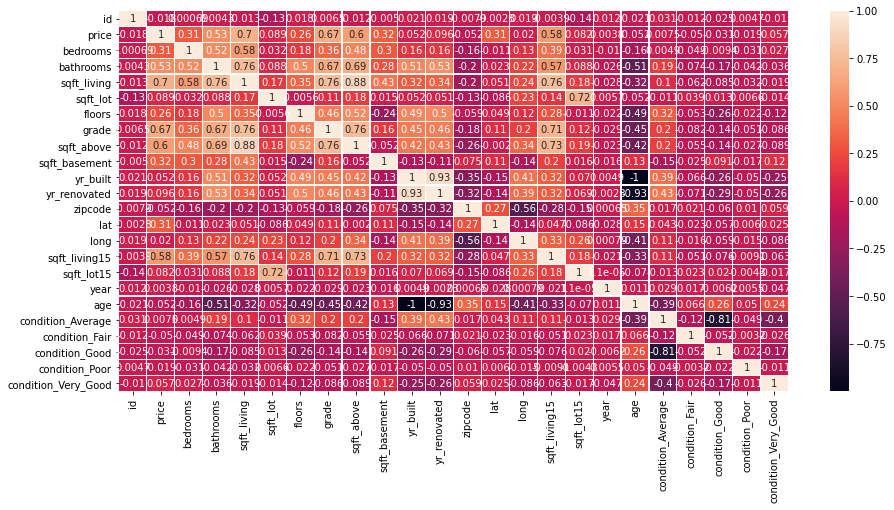

In [39]:
# plotting the correlationmatrix 
plt.figure(figsize =(15,7))
sns.heatmap(df_final.corr() , annot =True , linewidth =0.2)
plt.show()

Based on the correlation matrix there some variables are highly correlated which should be considered for linear regression.

### 4.2 Dropping unwanted columns that we did not drop

In [40]:
# dropping unwanted columns
df_final = df_final.drop(['date','id', 'waterfront', 'year', 'yr_built','yr_renovated','sqft_lot', 'grade', 'sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [41]:
#view the remaining dataframe
df_final

,price,bedrooms,bathrooms,sqft_living,floors,condition,age,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
15937,268950.0,3,1.00,1320,1.0,Average,71,1,0,0,0,0
20963,399900.0,2,1.75,1410,1.5,Average,3,1,0,0,0,0
7614,339000.0,3,1.00,1100,1.0,Good,72,0,0,1,0,0
3257,380000.0,2,1.00,1040,1.0,Very Good,76,0,0,0,0,1
16723,365000.0,5,2.00,1600,1.5,Average,87,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3553,402500.0,4,2.00,1650,1.0,Average,64,1,0,0,0,0
8800,235000.0,3,1.00,1430,1.5,Good,85,0,0,1,0,0
8404,400000.0,3,1.00,1460,1.0,Average,62,1,0,0,0,0
6729,647500.0,4,1.75,2060,1.0,Good,67,0,0,1,0,0


### 4.3 Outliers for selected data

#### 4.3.1 Checking for outliers

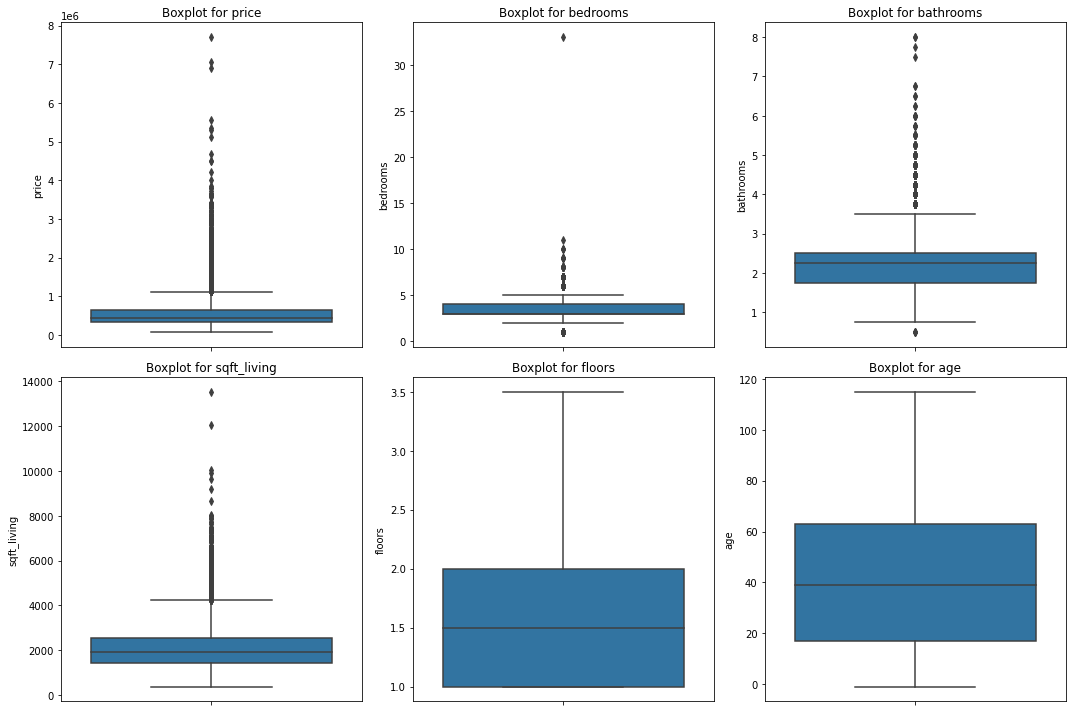

In [42]:
# Define the subset of columns you want to check for outliers
subset_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'age']

n_cols = 3
n_rows = (len(subset_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Creating a list to store individual axes of objects
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, 10)) 

# Flatten the axis for easy iteration
axes = np.array(axes).flatten()

# Create boxplots for each column
for i, column in enumerate(subset_columns):
    sns.boxplot(y=df[column], ax=axes[i], orient="h")
    axes[i].set_title(f'Boxplot for {column}')

# Set unused subplots as None
for j in range(len(subset_columns), n_rows * n_cols):
    axes[j].axis('off')

# Tight layout ensures the layout of the subplots is adjusted appropriately
plt.tight_layout()
plt.show()

#### 4.3.2 Correcting for outliers

In [43]:
#outliers for bedroom
df_bedroom_outliers = df_final[df_final['bedrooms'] > 30]
df_bedroom_outliers

,price,bedrooms,bathrooms,sqft_living,floors,condition,age,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
15856,640000.0,33,1.75,1620,1.0,Very Good,67,0,0,0,0,1


In [44]:
df_final['price'].mean()/df_final['bedrooms'].mean()

160443.49872699598

It appears that the property with bedrooms > 30 stands out as an anomaly. When examining the details of that specific record, it turns out to be a house with an area of 1620 square feet, 1.75 bathrooms, and a sale price of 640,000 dollars. The calculated average price per bedroom for other houses is 160,443.5 dollars. Due to this significant deviation, this particular entry is considered unreliable and has been excluded from any subsequent analysis.

In [45]:
#drop the row with the 33 bedrooms
df_final.drop(15856, axis = 0, inplace = True)
# reset index, because a row is droped.
df_final.reset_index(drop=True, inplace = True)
df_final.shape

(21419, 12)

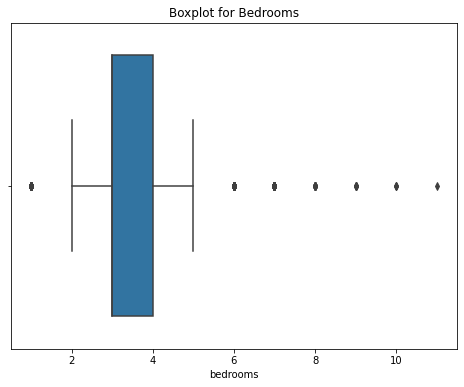

In [46]:
# Created a revised boxplot for 'bedrooms'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_final['bedrooms'])
plt.title('Boxplot for Bedrooms')
plt.show()

## 5. Target and Feature basic_relationships/Visualizations

Our target to be determined and used for modelling is price. Our features will be bedrooms, bathrooms, sqft_living, floors, age and condition.

### 5.1 Price and Bedrooms

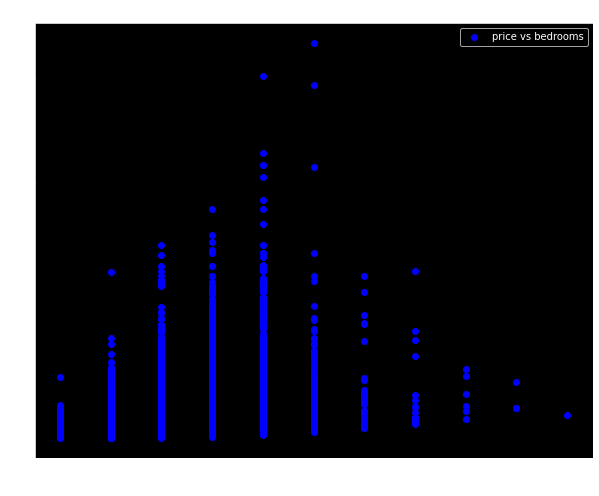

In [47]:
# Price and Bedrooms
plt.figure(figsize=(10,8))
plt.style.use("dark_background")
plt.scatter(data=df_final, x='bedrooms', y='price', color='blue')

plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Price vs Bedrooms')
plt.legend(['price vs bedrooms'])
plt.show();

### 5.2 Price and Floors

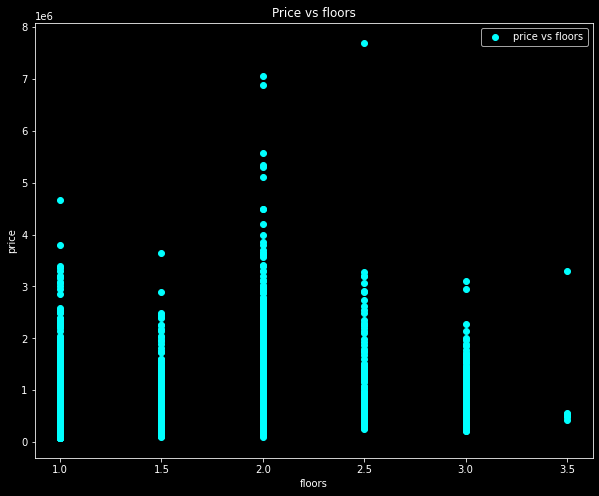

In [48]:
# Price and Floors
plt.figure(figsize=(10,8))
plt.scatter(data=df_final, x='floors', y='price', color='cyan')

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price vs floors')
plt.legend(['price vs floors'])
plt.show();

### 5.3 Price and Bathrooms

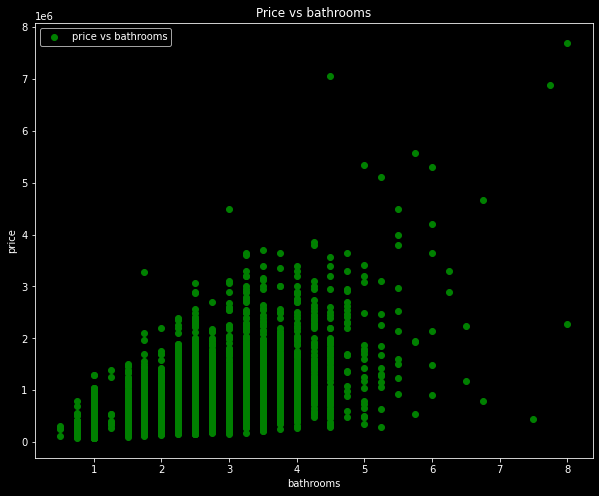

In [49]:
# Price and Bathrooms
plt.figure(figsize=(10,8))
plt.scatter(data=df_final, x='bathrooms', y='price', color='green')

plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Price vs bathrooms')
plt.legend(['price vs bathrooms'])
plt.show();

### 5.4 Price and Age

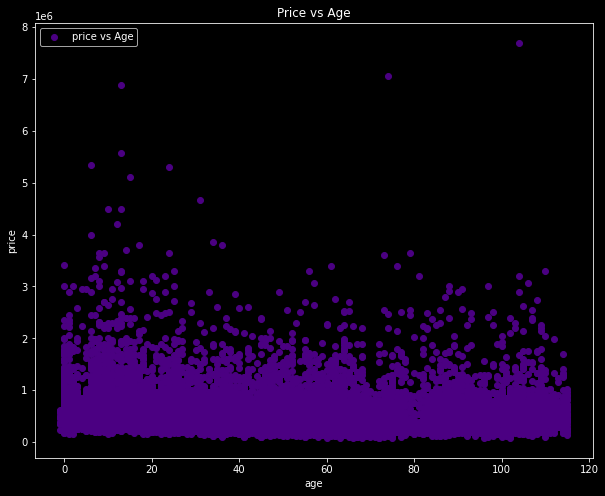

In [50]:
# Price and Bathrooms
plt.figure(figsize=(10,8))
plt.scatter(data=df_final, x='age', y='price', color='indigo')

plt.xlabel('age')
plt.ylabel('price')
plt.title('Price vs Age')
plt.legend(['price vs Age'])
plt.show();

### 5.5 Price and sqft_living

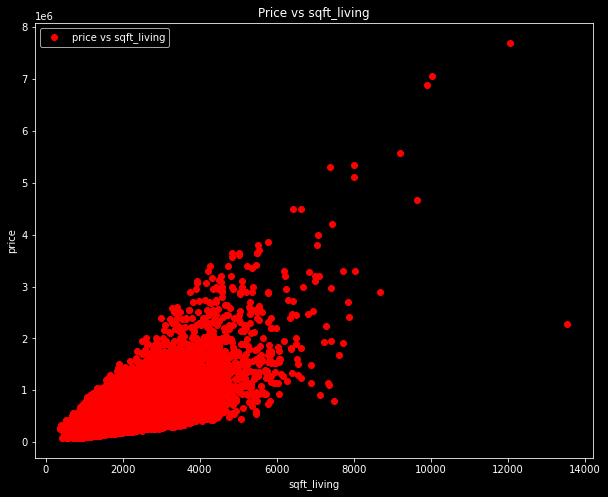

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(data=df_final, x='sqft_living', y='price', color='red')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price vs sqft_living')
plt.legend(['price vs sqft_living'])
plt.show();

### 5.6 Price and Condition

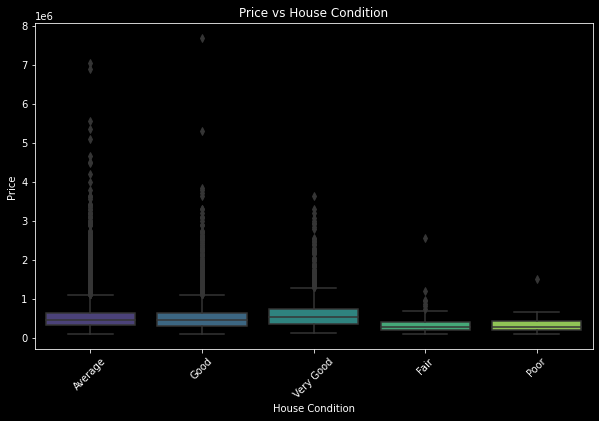

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='condition', y='price', palette='viridis')
plt.xlabel('House Condition')
plt.ylabel('Price')
plt.title('Price vs House Condition')
plt.xticks(rotation=45)
plt.show()

## 6. Regression Analysis

### 6.1 Our Features and Targets

#### 6.1.1 Our Features / Independent Variables

In [53]:
# The features of our regression model will be bedrooms, bathrooms, sqft_living, floors, age and condition
features = df_final[['sqft_living','floors', 'age', 'bathrooms', 'bedrooms', 'condition_Average', 'condition_Fair',	'condition_Good', 'condition_Poor', 'condition_Very_Good']]
features

,sqft_living,floors,age,bathrooms,bedrooms,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
0,1320,1.0,71,1.00,3,1,0,0,0,0
1,1410,1.5,3,1.75,2,1,0,0,0,0
2,1100,1.0,72,1.00,3,0,0,1,0,0
3,1040,1.0,76,1.00,2,0,0,0,0,1
4,1600,1.5,87,2.00,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21414,1650,1.0,64,2.00,4,1,0,0,0,0
21415,1430,1.5,85,1.00,3,0,0,1,0,0
21416,1460,1.0,62,1.00,3,1,0,0,0,0
21417,2060,1.0,67,1.75,4,0,0,1,0,0


#### 6.1.2 Our Target / Dependent Variable

In [54]:
# Our target is Price
target = df_final['price']
target

0        268950.0
1        399900.0
2        339000.0
3        380000.0
4        365000.0
           ...   
21414    402500.0
21415    235000.0
21416    400000.0
21417    647500.0
21418    280000.0
Name: price, Length: 21419, dtype: float64

### 6.2 Simple linear regression

Since sqft_living is the feature with the strongest correlation, we will build a simple linear regression with that.

#### 6.2.1 Estimating the model

In [55]:
#creating a simple linear regression model and obtaining the summary
simple_formula = 'price~sqft_living'
simple_model = ols(simple_formula, df_final).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:30:04   Log-Likelihood:            -2.9762e+05
No. Observations:               21419   AIC:                         5.953e+05
Df Residuals:                   21417   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.363e+04   4437.771     -9.831      0.000   -5.23e+04   -3.49e+04
sqft_living   280.8010      1.949    144.064      0.000     276.981     284.622
==============================================================================
Omnibus:                    14693.177   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539257.422
Skew:                           2.823   Prob(JB):                         0.00
Kurtosis:                      26.924   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 6.2.2 Interpreting the simple linear regression parameters

In [56]:
#calculate and print the coefficients(slope and intercept) of our simple linear regression
# Slope (coefficient of GrLivArea)
m = simple_model.params['sqft_living']

# Intercept (coefficient of Intercept)
b = simple_model.params['Intercept']

print(f"""
Our simple linear regression model found a y-intercept
of ${round(b, 2)}, then for every increase of 1 square foot
above-ground living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept
of $-43628.22, then for every increase of 1 square foot
above-ground living area, the price increases by $280.8 



#### 6.2.3 Plotting a simple linear regression line and residuals

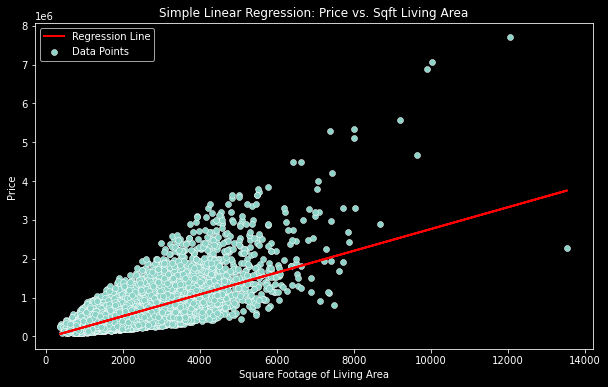

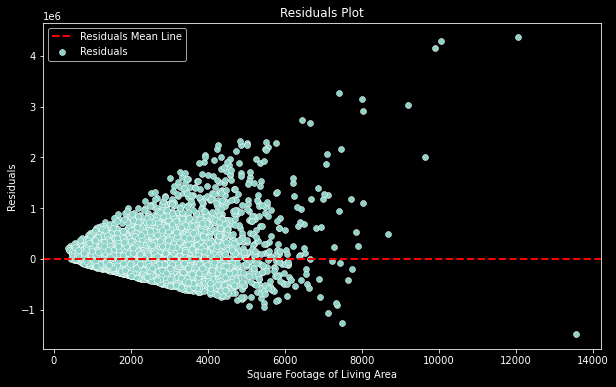

In [57]:

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_final, label='Data Points')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs. Sqft Living Area')

# Regression line
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, df).fit()
x = df['sqft_living']
y_pred = simple_model.predict(df)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

# Display the legend
plt.legend()

# Create a new plot for residuals
plt.figure(figsize=(10, 6))
residuals = df['price'] - y_pred
sns.scatterplot(x=x, y=residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuals Mean Line')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Display the legend
plt.legend()

plt.show()


#### 6.2.4 Interpretation of Results 

R-squared (R²): The R-squared value stands at 0.492, signifying that around 49.2% of the variability in 'price' can be accounted for by the linear association with 'sqft_living'.

Summary of the Model: This constitutes a basic linear regression model (Model: OLS) with 'sqft_living' as the solitary independent variable.

The model's coefficients (const and sqft_living) are both statistically significant, with p-values for their t-statistics comfortably below 0.05.

Regression Coefficients: The coefficients section furnishes the formula for the linear regression model:

The intercept (constant term) is -43,630 (const).
The coefficient for 'sqft_living' is 280.801.
Hence, the simple linear regression equation, derived from this output, is as follows:

price = -43,630 + 280.801 * sqft_living

This equation delineates the connection between a house's 'price' and its living space's square footage ('sqft_living'). For each additional square foot of living space, it is anticipated that the 'price' will increase by 280.863 units, assuming all other variables remain constant.

## 6.3 Building a multiple regression model

#### 6.3.1 Estimating the model

In [58]:
#performing multiple linear regression
multiple_formula = 'price ~ bedrooms + sqft_living + age + floors + bathrooms + condition_Average + condition_Fair + condition_Good + condition_Poor + condition_Very_Good'
multiple_model = ols(multiple_formula, df_final).fit()
multiple_model_summary = multiple_model.summary()

multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     3003.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:30:27   Log-Likelihood:            -2.9614e+05
No. Observations:               21419   AIC:                         5.923e+05
Df Residuals:                   21409   BIC:                         5.924e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.915e+05   1.17e+04    -16.320      0.000   -2.15e+05   -1.69e+05
bedrooms             -7.47e+04   2352.760    -31.751      0.000   -7.93e+04   -7.01e+04
sqft_living           302.3099      2.973    101.698      0.000     296.483     308.137
age                  3304.6411     73.993     44.662      0.000    3159.610    3449.672
floors               5.797e+04   3834.261     15.119      0.000    5.05e+04    6.55e+04
bathrooms            6.942e+04   3883.020     17.879      0.000    6.18e+04     7.7e+04
condition_Average   -2.703e+04   8860.422     -3.050      0.002   -4.44e+04   -9658.693
condition_Fair      -8.255e+04   1.79e+04     -4.623      0.000   -1.18e+05   -4.76e+04
condition_Good      -1.604e+04   8992.428     -1.784      0.074   -3.37e+04    1582.235
condition_Poor      -7.737e+04   3.87e+04     -1.997      0.046   -1.53e+05   -1434.579
condition_Very_Good  1.144e+04      1e+04      1.139      0.255   -8239.978    3.11e+04
==============================================================================
Omnibus:                    14166.395   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           522975.847
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      26.612   Cond. No.                     2.00e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.2 Plotting the multiple regression model

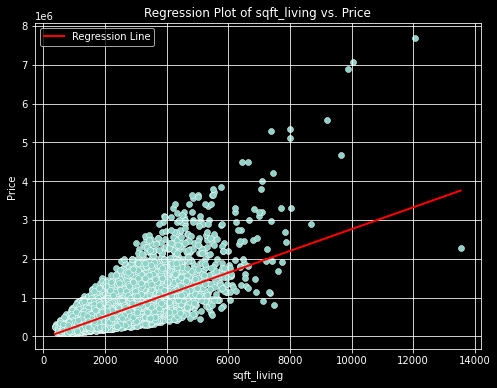

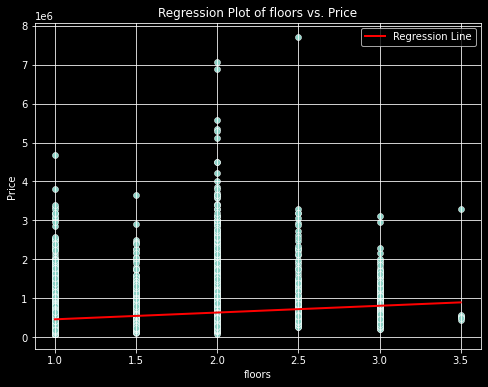

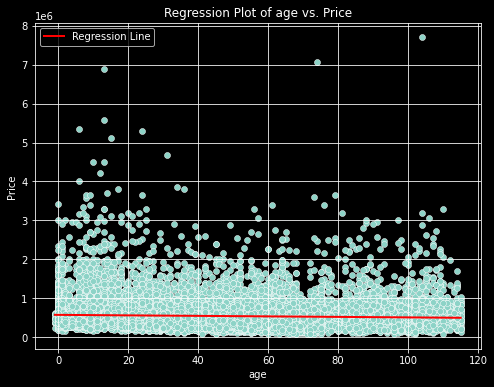

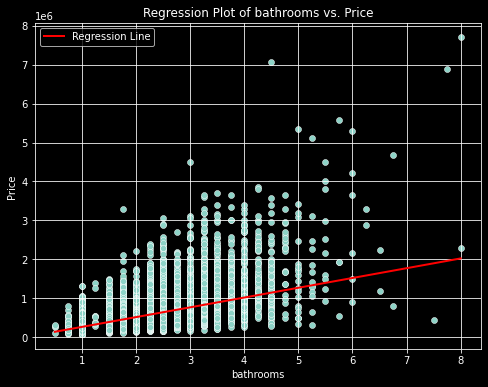

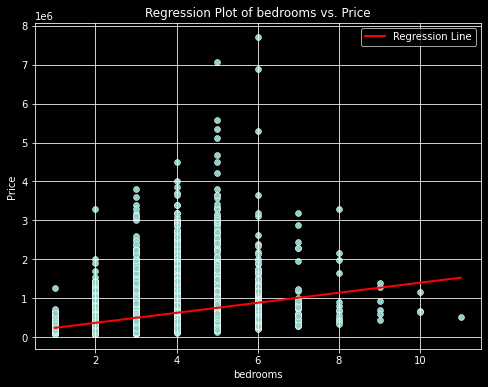

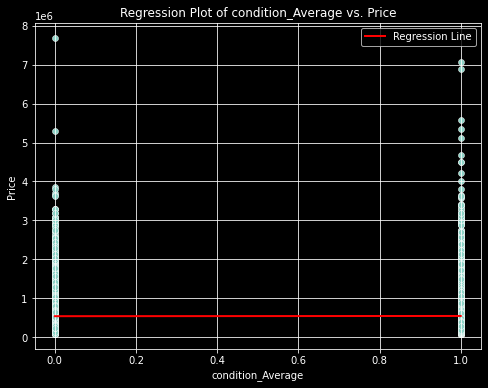

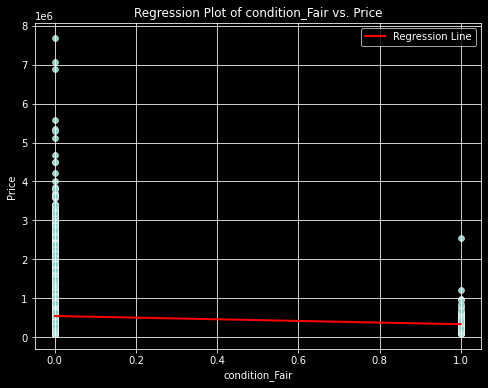

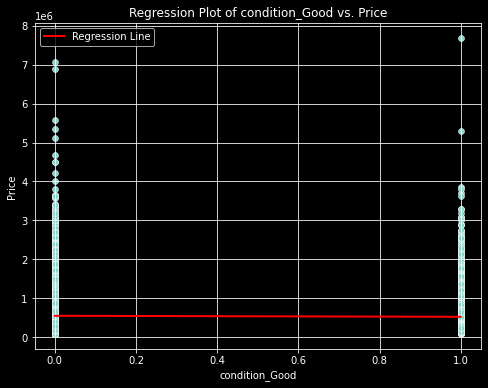

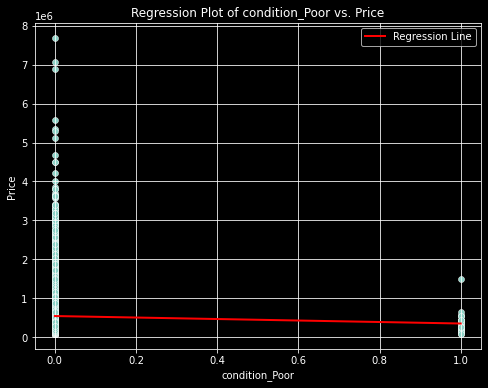

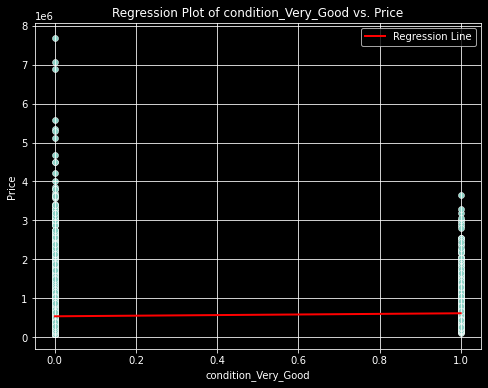

In [59]:
# Define the independent variables
independent_vars = ['sqft_living','floors', 'age', 'bathrooms', 'bedrooms', 'condition_Average', 'condition_Fair',	'condition_Good', 'condition_Poor', 'condition_Very_Good']

# Create a scatter plot with regression line for each independent variable
for var in independent_vars:
    # Fit the regression model for the current variable
    formula = f'price ~ {var}'
    model = ols(formula, data=df_final).fit()

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_final[var], y=df_final['price'])
    plt.title(f'Regression Plot of {var} vs. Price')
    plt.xlabel(var)
    plt.ylabel('Price')

    # Plot the regression line
    x = np.linspace(df_final[var].min(), df_final[var].max(), 100)
    y = model.params[0] + model.params[1] * x
    plt.plot(x, y, color='red', linewidth=2, label='Regression Line')

    plt.legend()
    plt.grid(True)
    plt.show()





#### 6.3.4 Intepretation of Results

R-squared (R²): The R-squared value is 0.558, signifying that approximately 55.8% of the variation in 'price' can be accounted for by the linear relationship with the six independent variables ('sqft_living', 'bathrooms', 'bedrooms', 'floors', 'age' and condition ('condition_Avarage''condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good')).

The model demonstrates overall statistical significance, with an F-statistic p-value significantly below 0.05.

Among the independent variables, 'const', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'condition_Avarage', 'condition_Poor' and 'condition_Fair' exhibit statistical significance, with p-values below our significance level (alpha of 0.05). This indicates that these variables have a substantial impact on 'price'. In contrast, 'condition_Good' and "condition_Very_Good' have p-values exceeding our alpha of 0.05, at 0.074 and 0.255, respectively, implying that they are not 'statistically significant in predicting 'price'.

Model Summary: This is a multiple linear regression model (Model: OLS) with six independent variables.

Coefficients: The coefficients section provides the equation for the multiple linear regression model:

The intercept (constant term) is approximately $191,500, ('const'). This means that when all independent variables are zero (which may not be meaningful in this context), the estimated baseline price of a home is around -$191,500.

The coefficient for 'sqft_living' is approximately 302.31. This implies that for each additional square foot of living space in a home, we anticipate the price to increase by roughly $302.31, assuming all else remains constant.

The coefficient for 'bathrooms' is approximately $69,420. This suggests that for each additional bathroom in a home, we expect the price to increase by about $69,420, all else being equal.

The coefficient for 'bedrooms' is approximately -$74,700,170. This indicates that for each additional bedroom in a home, we anticipate the price to decrease by approximately $74,700,170, all else being equal.

The coefficient for 'floors' is approximately $57,970. This implies that for each additional floor in a home, we expect the price to increase by approximately $57,970, all else being equal.

The coefficient for 'Age' is approximately $3,304.64. This indicates that for each additional age  in a home, we anticipate the price to increase by approximately $3,304.64(this may not be meaningfull as we earlier seen in the visualization of age againts price), all else being equal

The coefficient for 'condition_Avarage' is approximately -$27,030

The coefficient for 'condition_Fair' is approximately -$82,550.

The coefficient for 'condition_Good' is approximately -$16,040.

The coefficient for 'condition_Poor' is approximately -$77,370

The coefficient for 'condition_Very Good' is approximately $114,400.

Hence, the multiple linear regression equation based on this output is:

In this regression, the reference category for condition is 'average.' This has implications for the interpretation of the constant term (const) as well as the other condition-related features.

First, the constant term (const) signifies that all other variables are set to zero. This means sqft_living is 0, bathrooms is 0, and so on, and the condition is average.

For 'condition_Fair,' the difference compared to an average house is approximately -$4,768.50, indicating a decrease in price associated with a house in fair condition compared to an average one. Similarly, 'condition_Good' is compared to an average house, showing an increase of about $49,570 in price for a house in good condition compared to an average one.

So, the multiple linear regression equation is:

price = -$191,500 + ($302.31 * sqft_living) + ($3,304.64* age) + ($69,420 * bathrooms) - ($74,,700 * bedrooms) + ($57,978 * floors)- ($27,030 * condition_Avarage) - ($82,550* condition_Fair) - ($16,040 * condition_Good) - ($77,370 * condition_Poor) + ($114,400 * condition_Very Good)

This equation represents the relationship between the 'price' of a house and multiple independent variables, including square footage of living space ('sqft_living'),(Age), the number of bathrooms ('bathrooms'), the number of bedrooms ('bedrooms'), the number of floors ('floors'), and five categorical variables representing different conditions ('condition_Avarage'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good'). Each coefficient represents the change in the 'price' associated with a one-unit change in the respective independent variable, while holding all other variables constant.

## 7. Creating a Predictive Model

This predictive model takes in the number of bedrooms, area occupied by the house (sqft_living), age of the house, number of floors, number of bathrooms and condition of the house as inputs and predicts the price of the house.

In [60]:
# Define the coefficients obtained from your multiple_model
intercept = -1.915e+05
coeff_bedrooms = -7.47e+04
coeff_sqft_living = 302.3099
coeff_age = 3304.6411
coeff_floors = 5.797e+04
coeff_bathrooms = 6.942e+04
coeff_condition_Average = -2.703e+0
coeff_condition_Fair = -8.255e+04
coeff_condition_Good = -1.604e+04
coeff_condition_Poor = -7.737e+04
coeff_condition_Very_Good = 1.144e+04    

# Input values for prediction
input_bedrooms = int(input("Enter the number of bedrooms: "))
input_sqft_living = float(input("Enter the square footage of living area: "))
input_age = int(input("Enter the age of the house: "))
input_floors = float(input("Enter the number of floors: "))
input_bathrooms = float(input("Enter the number of bathrooms: "))
input_condition = input("Enter the condition (Average, Fair, Good, Poor, or Very Good): ")

# Map the condition to the corresponding coefficient
condition_coefficients = {
    "Average": coeff_condition_Average,
    "Fair": coeff_condition_Fair,
    "Good": coeff_condition_Good,
    "Poor": coeff_condition_Poor,
    "Very Good": coeff_condition_Very_Good
}

# Calculate the predicted price
if input_condition in condition_coefficients:
    predicted_price = (
        intercept
        + coeff_bedrooms * input_bedrooms
        + coeff_sqft_living * input_sqft_living
        + coeff_age * input_age
        + coeff_floors * input_floors
        + coeff_bathrooms * input_bathrooms
        + condition_coefficients[input_condition]
    )
    print(f"Predicted Price: ${predicted_price:.2f}")
else:
    print("Condition not recognized. Please enter a valid condition.")

Enter the number of bedrooms: 3
Enter the square footage of living area: 1200
Enter the age of the house: 3
Enter the number of floors: 4
Enter the number of bathrooms: 5
Enter the condition (Average, Fair, Good, Poor, or Very Good): Good
Predicted Price: $520025.80


## 8. Conclusion

According to the Ordinary Least Squares (OLS) regression results, the multiple linear regression model created to determine the primary factors influencing house prices in the northwestern county possesses an adjusted R-squared value of 0.558, indicating that it can account for approximately 55.8% of the variation in house prices using the selected features. The model is statistically significant, as evidenced by the F-statistic of 3,003 and a corresponding p-value of 0.00.

Several features exhibit significant impacts on house prices in the region. Notable factors include the square footage of the living area (sqft_living),floor,age,the house condition, the number of bedrooms and bathrooms, 

The developed model can serve as a valuable tool for determining optimal pricing strategies for the real estate agency. It offers coefficients for each feature, enabling the agency to estimate property prices more accurately by considering these coefficients and the property's specific attributes. Additionally, by comparing predicted prices with actual prices, the agency can pinpoint overpriced or underpriced homes and make necessary adjustments to maximize sales potential.

The analytical insights and pricing strategies derived from this project can make a substantial contribution to enhancing the agency's annual revenue. Leveraging the model's findings and implementing the recommended pricing strategies will empower the agency to improve decision-making, attract potential buyers, and increase the volume of homes sold.

In summary, this research has successfully achieved its objectives by identifying the key features that influence house prices, formulating an optimal pricing strategy through multiple linear regression, identifying overpriced or underpriced properties, and providing insights to enhance the agency's annual revenue. Implementing these research findings will enable the Falcon real estate agency to make informed pricing decisions, resulting in increased sales and overall performance improvements in the northwestern county housing market.






## 9. Recommendation

Based on the analysis performed and the results obtained from the multiple linear regression model, the following recommendations are suggested for the Falcon real estate agency:

Prioritize Key Features: The analysis highlights that several crucial features have a substantial impact on house prices in the northwestern county. These influential factors encompass square footage of living space, age of the house, the number of bedrooms and bathrooms, floors and the conditin of the house. It is advisable for the agency to give special attention to these factors when setting house prices.

Optimize Pricing Strategy: Make use of the robust multiple linear regression model that has been developed to create an optimal pricing strategy. The coefficients obtained from the model offer insights into the effects of each feature on house prices. By incorporating these coefficients and staying attuned to market trends, Falcon real estate agency can establish competitive and appealing prices for their listed properties. This strategy will enhance the prospects of selling homes at desirable price points.

Identify Overpriced and Underpriced Houses: By comparing the predicted prices generated by the model with the actual prices of houses, the agency can identify properties that are either overpriced or underpriced in their inventory. This information can guide them in making price adjustments to improve sales and maintain competitive pricing in the market.

Leverage Analytical Insights: The analytical insights derived from this research project can make a significant contribution to boosting the agency's annual revenue. By integrating these findings into their decision-making processes,Falcon real estate agency can gain a competitive edge, attract a larger pool of buyers, and increase their overall sales volume. Regular updates and refinements to the model should be undertaken as new data becomes available to ensure its accuracy and relevance.

In conclusion, by implementing the aforementioned recommendations and harnessing the developed multiple linear regression model, Falcon real estate agency can elevate their pricing strategy, identify lucrative opportunities, and ultimately boost their annual sales. The insights gained from this research lay a solid foundation for data-driven decision-making and gaining a competitive advantage in the real estate market.